**Neural Networks- Fall 2023**

**Cracow University of Technology**

**Laboratory No. 4:**

**1) Implementation of backward pass of a two-layer neural network.**


**2) Neural Network Training with Regularization**



Task 1

Write the backpropagation code for a two-layer neural network based on the neural network architecture and forward pass implementation of Lab 3/ Task 2.
As a reminder, activations in both layers are Sigmoid and loss is binary cross entropy and there are two neurons in the hidden layer. The dataset is repeated in the following code snippet.
Remeber to add the forward pass code from your previous code.

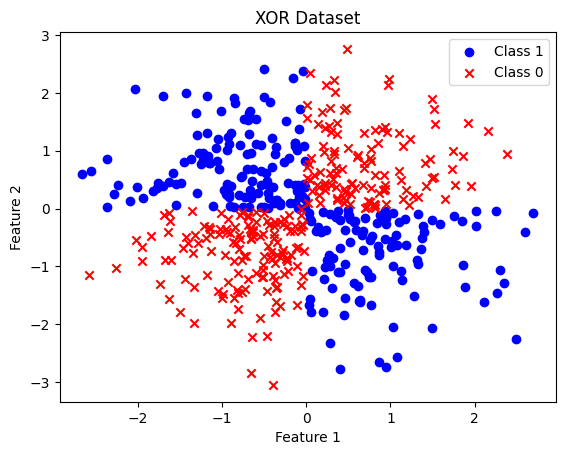

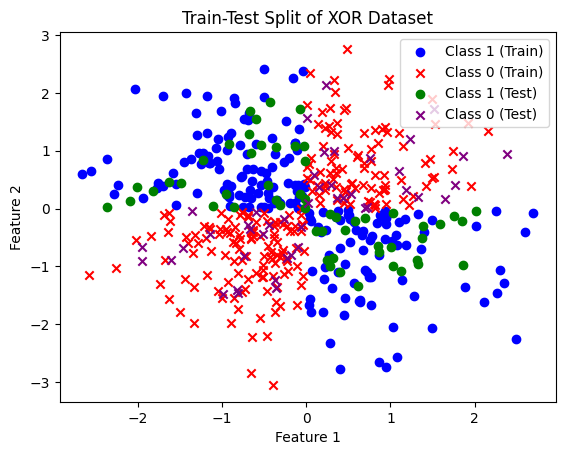

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)


plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='x', label='Class 0')

plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training set
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', marker='o', label='Class 1 (Train)')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', marker='x', label='Class 0 (Train)')

# Plot the testing set
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='green', marker='o', label='Class 1 (Test)')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='purple', marker='x', label='Class 0 (Test)')

plt.title('Train-Test Split of XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()







### TO DO ####




##############

Task 2:
For this task, please read the instructions provided to you in the separate file.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [70]:
iris = load_iris()
X, y = iris.data, iris.target

In [71]:
X = X / np.max(X)

In [72]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [74]:
input_size = X_train.shape[1] # input layer size
hidden_size = 32 # hidden layer size
output_size = y_train.shape[1] # output layer size

In [75]:
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [76]:
learning_rate = 0.1
num_epochs = 1000
batch_size = 16
l1_lambda = 0.001
l2_lambda = 0.001

In [123]:
def categorical_cross_entropy_loss(y_true, y_pred):
    # avoid numerical instability by adding a small constant to log
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    print(loss)
    print("####")
    return loss

def derivative_categorical_cross_entropy_loss(y_true, y_pred):
    return (y_pred - y_true) / y_true.shape[0]

In [78]:
def softmax(x):
    x -= np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
def derivative_softmax(x):
    s = softmax(x)
    return s * (1 - s)

In [79]:
def relu(x):
    # avoid numerical instability by subtracting max value
    x -= np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
def derivative_relu(x):
    s = softmax(x)
    return s * (1 - s)

In [80]:
def L1_reg(lambda_, W1, W2):
    return lambda_ * (np.sum(np.abs(W1)) + np.sum(np.abs(W2)))
def derivative_L1_reg(lambda_, W):
    return lambda_ * np.sign(W)
def L2_reg(lambda_, W1, W2):
    return lambda_ * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
def derivative_L2_reg(lambda_, W):
    return lambda_ * 2 * W

In [81]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, std=0.01):
        # Initialize the weights of the network
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def forward_pass(self, X):
        z1 = X.dot(W1) + b1
        a1 = np.maximum(0, z1)

        z2 = a1.dot(W2) + b2
        self.scores = z2

        exp_scores = np.exp(scores)
        a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    


In [157]:
def L1_reg(lambda_, W1, W2):
    return lambda_ * (np.sum(np.abs(W1)) + np.sum(np.abs(W2)))
def derivative_L1_reg(lambda_, W):
    return lambda_ * np.sign(W)
def L2_reg(lambda_, W1, W2):
    return lambda_ * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
def derivative_L2_reg(lambda_, W):
    return lambda_ * 2 * W

def init_parameters(input_size, hidden_size, output_size, std = 0.01):
    params = {}

    params['W1'] = std * np.random.randn(input_size, hidden_size)
    params['b1'] = np.zeros(hidden_size)
    params['W2'] = std * np.random.randn(hidden_size, output_size)
    params['b2'] = np.zeros(output_size)

    return params

def forward_pass2(X, y, params):
    z1 = np.dot(X, params['W1']) + params['b1']
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, params['W2']) + params['b2']
    exp_scores = np.exp(z2)
    a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


    N = X.shape[0]
    reg = 0.5
    
    corect_logprobs = -np.log(a2[range(N), np.argmax(y, axis=1)])
    
    data_loss = np.sum(corect_logprobs) / N
    
    reg_loss = L1_reg(l1_lambda, W1, W2) + L2_reg(l2_lambda, W1, W2)

    loss = data_loss + reg_loss
    


    return a2, {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}, loss

def forward_pass(X, y, params, l1_lambda=0, l2_lambda=0):
    z1 = np.dot(X, params['W1']) + params['b1']
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, params['W2']) + params['b2']
    exp_scores = np.exp(z2)
    a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    N = X.shape[0]
    
    # Categorical Cross-Entropy Loss
    data_loss = -np.sum(np.log(a2[range(N), np.argmax(y, axis=1)])) / N

    
    reg_loss = L1_reg(l1_lambda, W1, W2) + L2_reg(l2_lambda, W1, W2)

    loss = data_loss + reg_loss

    return a2, {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}, loss


def cost(predict, actual):
    return categorical_cross_entropy_loss(actual, predict)

def back_propagation(X,Y, params, cache):
    grads = {}
    dscores = cache['a2']
    dscores[range(X.shape[0]), np.argmax(Y, axis=1)] -= 1
    dscores /= X.shape[0]

    grads['W2'] = np.dot(cache['a1'].T, dscores)
    grads['b2'] = np.sum(dscores, axis=0)

    dhidden = np.dot(dscores, params['W2'].T)

    dhidden[cache['a1'] <= 0] = 0

    grads['W1'] = np.dot(X.T, dhidden)
    grads['b1'] = np.sum(dhidden, axis=0)

    return grads

def update_parameters(params, grads, learning_rate):
    params['W1'] -= learning_rate * grads['W1']
    params['b1'] -= learning_rate * grads['b1']
    params['W2'] -= learning_rate * grads['W2']
    params['b2'] -= learning_rate * grads['b2']

    return params

def predict(X, params):
    z1 = np.dot(X, params['W1']) + params['b1']
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, params['W2']) + params['b2']
    exp_scores = np.exp(z2)
    a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return a2

def train(X, Y, learning_rate, hidden_size, epochs = 5000):
    params = init_parameters(X.shape[1], hidden_size, Y.shape[1])
    cost_ = []
    for i in range(epochs):
        _, cache, costit = forward_pass(X,Y, params)
        grads = back_propagation(X, Y, params, cache)
        #costit = cost(cache['a2'], Y)
        cost_.append(costit)
        params = update_parameters(params, grads, learning_rate)
        

        #if i % 1000 == 0:
        #    a2, _ = forward_pass(X, params)
        #    cost_.append(cost(a2, Y))
    return params, cost_

In [158]:
params_, cost = train(X_train, y_train, 0.3, hidden_size)

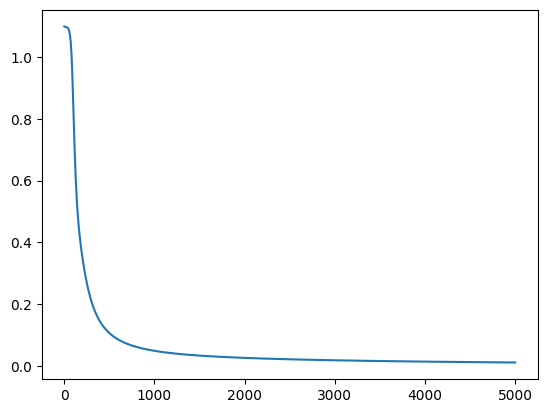

In [159]:
import matplotlib.pyplot as plt
plt.plot(cost)